# Introduction


In this homework, you'll be required to load in a dataset which has about 500 features. By using
Lasso ($L^1$) regression, we'll find the optimal constraint on the $L^1$ norm which gives us the best
$R^2$. Then we'll plot the results.

Recall we minimize the following on ** training data: $(x_i,y_i)$**

$$\min_{\beta} \frac{1}{N} \sum_{i=1}^N (y_i - \beta \cdot x_i)^2 + \lambda \|\beta \|_{L^1}.$$


Denoting $\beta_{\lambda}$ as the minimum of the above, we then choose $\lambda$ to maximize $R^2$ on **testing data: $(x_j,y_j)$**

$$ \max_{\lambda} 1 - \frac{\sum_{j} (y_j - \beta_{\lambda} \cdot x_j)^2}{\sum_j (y_j - \bar y)^2}$$


# Lasso Regularization

## Problem 1

a) Load in hw2data.csv from ../data into a pandas dataframe.

In [5]:
import pandas as pd
import numpy as np
data1=pd.read_csv("/home/zhejing/APMAE4990--master/data/hw2data.csv")    


b) Set y to be the y variable in the dataframe from a and X to be the remaining features.

In [6]:
X = data1.drop(labels='y', axis=1)
y = data1.y

c) As shown in the Booking.com example, using Lasso regression, find the regularization strength
which optimizes the $R^2$. 

**Hint:** Take a range of alpha from `np.logspace(-8,-3,1000)`

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


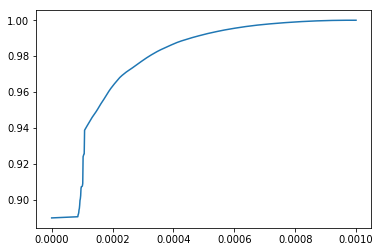

In [8]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#standardize 
scaler = StandardScaler()
Xscale = X.as_matrix().astype(np.float)
Xscale = scaler.fit_transform(X)
#split data
X_train, X_test, y_train, y_test = train_test_split(Xscale, y, test_size=0.2, random_state=42)


alphas = np.logspace(-8, -3, 1000)
scores = []
for alpha in alphas:
    regr = Lasso(alpha=alpha)
    regr.fit(X_train, y_train)
    scores.append(regr.score(X_test, y_test))

index_opt = np.array(scores).argmax()
opt_alpha = alphas[index_opt]
plt.plot(np.logspace(-8,-3,1000),scores)

In [9]:
scores[index_opt]

0.9999876511389487

In [10]:
opt_alpha

0.0009772146969725724

Based on the plot, we can see the score is very close and close to 1 when alpha is below 0.0002. In addition, the smallest alpha in this model is 0.00097721, and the score is 0.99998765, which is close to 1.

d) Plot the training perforamnce versus the testing performance, and observe whree the test performance is
maximized. I've written an outline of the code you need.

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


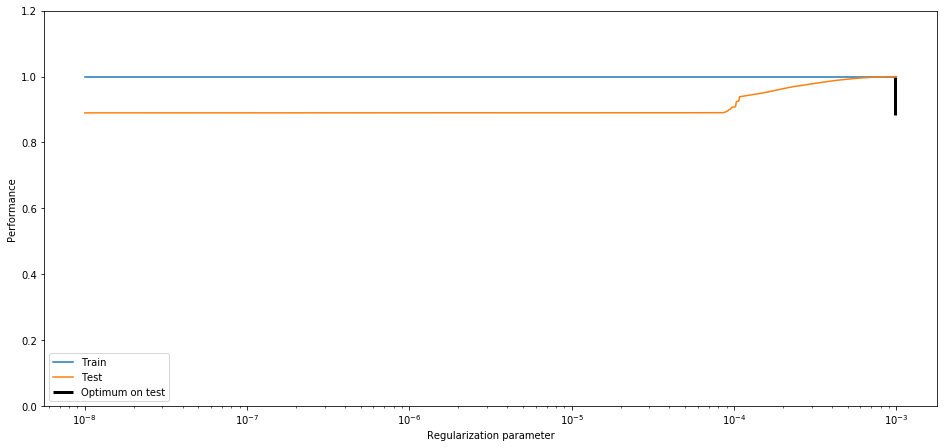

In [11]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline



plt.figure(figsize=(16,16))
plt.subplot(2, 1, 1)

# Fill these in
alpha_optim=opt_alpha
alphas = np.logspace(-8,-3,1000)
train_errors=[]
test_errors=[]

for i in alphas:
    clf=Lasso(alpha=i)
    a=clf.fit(X_train,y_train)
    train_errors.append(a.score(X_train,y_train))
    test_errors.append(a.score(X_test,y_test))



plt.semilogx(alphas, train_errors, label='Train')
plt.semilogx(alphas, test_errors, label='Test')
plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
           linewidth=3, label='Optimum on test')
plt.legend(loc='lower left')
plt.ylim([0, 1.2])
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')

plt.show()


e) Plot the top coefficients based on this optimal paramter. Why do you think so many are zero? 

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:830: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


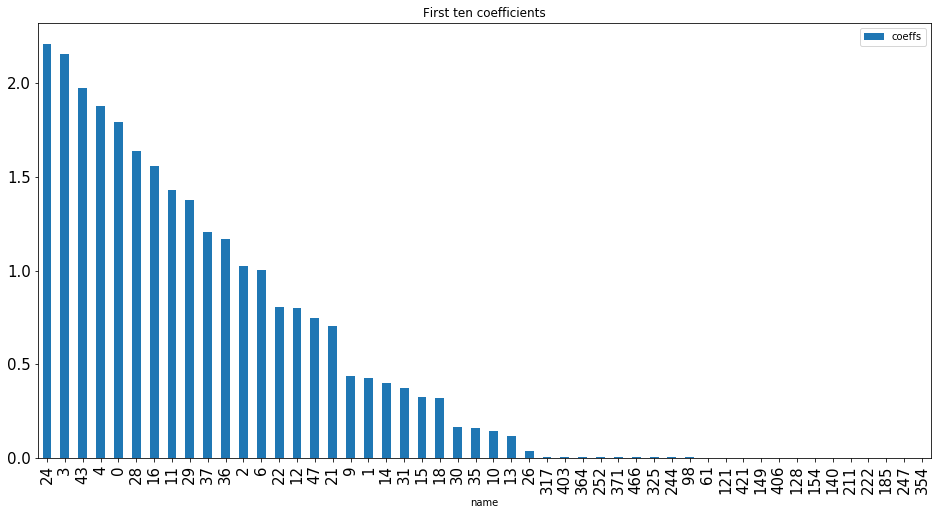

In [12]:
#plot highest 50 coeffiecient
regr = Lasso(alpha=opt_alpha)
regr.fit(X_train, y_train)
df_coeffs = pd.DataFrame({'coeffs':regr.coef_, 'name':X.columns.values})
df_coeffs = df_coeffs.sort(columns=['coeffs'])
df_coeffs[::-1].head(50).plot(x='name', 
                              y='coeffs', 
                              kind='bar', 
                              title='First ten coefficients',
                              figsize=(16, 8),
                              fontsize=15)

In [13]:
regr.coef_

array([ 1.79090298e+00,  4.26566259e-01,  1.02318975e+00,  2.15659764e+00,
        1.87759361e+00, -9.17357350e-01,  1.00129104e+00, -1.45804579e-01,
       -1.05180063e-01,  4.39326451e-01,  1.43012317e-01,  1.42902876e+00,
        8.00516469e-01,  1.16344358e-01,  3.99411396e-01,  3.25957957e-01,
        1.55823593e+00, -2.04492971e-01,  3.17839921e-01, -8.76203987e-01,
       -2.59653094e+00,  7.03068722e-01,  8.03146997e-01, -7.46241437e-01,
        2.20982130e+00, -1.34267221e+00,  3.93489591e-02, -1.95608313e-01,
        1.63507441e+00,  1.37732517e+00,  1.63068952e-01,  3.73086459e-01,
       -8.57796166e-01, -1.91839108e+00, -3.29036464e-01,  1.57617368e-01,
        1.16929663e+00,  1.20663870e+00, -3.72283128e-01, -3.13533733e-01,
       -1.08371502e+00, -1.46042326e+00, -1.75790625e+00,  1.97350850e+00,
       -5.01750725e-01, -4.90729399e-01, -1.19071517e+00,  7.44304856e-01,
       -1.63864115e+00, -2.01174070e-01, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -

Since in the Lasso regression, the penalty term is the absolute value of beta, while in the ridge regression, the penalty term is beta^2, so when beta is small,the penalty of Lasso is much larger than the penalty of Lasso Regression, which means that Lasso will not allow the existence of small coefficient.
In addition, based on the plot we discussed in class, the shape of lasso regression is like a diamond, which forces the coefficients towards the axis. 

f) Compute the $R^2$ with the optimal coefficient found above on 5 folds using cross_val_score and plot the
results. Does the model work well on all random subsets?

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

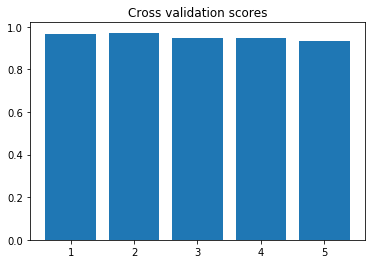

In [15]:
from sklearn.model_selection import cross_val_score, ShuffleSplit

regr = Lasso(alpha=opt_alpha)
scorecv = cross_val_score(regr, X_train, y_train, cv=5)
plt.bar(range(1, 6), scorecv)
plt.title('Cross validation scores')
plt.show()


Yes, the scores are close to each other and all of them are close to 1.

f) Repeat e) but using cross validation. Use error bars on the features which are the standard deviation of the 
coefficiens obtained above. For this problem I"ll walk you through the code. You just need to apply your optimal
$\alpha$ found above. 

In [19]:
from sklearn.cross_validation import KFold
from sklearn import preprocessing
def run_cv_coeffs(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    kf = KFold(len(y),n_folds=5,shuffle=True)
    y_pred = y.copy()
    coeffs=[]
    # Iterate through folds
    for train_index, test_index in kf:
        
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        # Initialize a classifier with key word arguments
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
        coeffs.append(clf.coef_)
    return coeffs

alpha_best = opt_alpha

scaler = preprocessing.StandardScaler()
X_scaled = X.as_matrix().astype(np.float)
X_scaled = scaler.fit_transform(X)

coeffs=run_cv_coeffs(X_scaled,np.array(y),Lasso,alpha=alpha_best)

In [20]:
    def get_coeffs(coeffs):
        coeffs_avgd = [(coeffs[0][i] + coeffs[1][i] + coeffs[2][i] + coeffs[3][i] + coeffs[4][i])/5 for i in range(0,len(X.columns))]
        coeffs_std = [np.std([coeffs[0][i],coeffs[1][i],coeffs[2][i],coeffs[3][i],coeffs[4][i]]) for i in range(0,len(X.columns))]
        return coeffs_avgd, coeffs_std
    coeffs_avg,coeffs_std=get_coeffs(coeffs)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:830: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


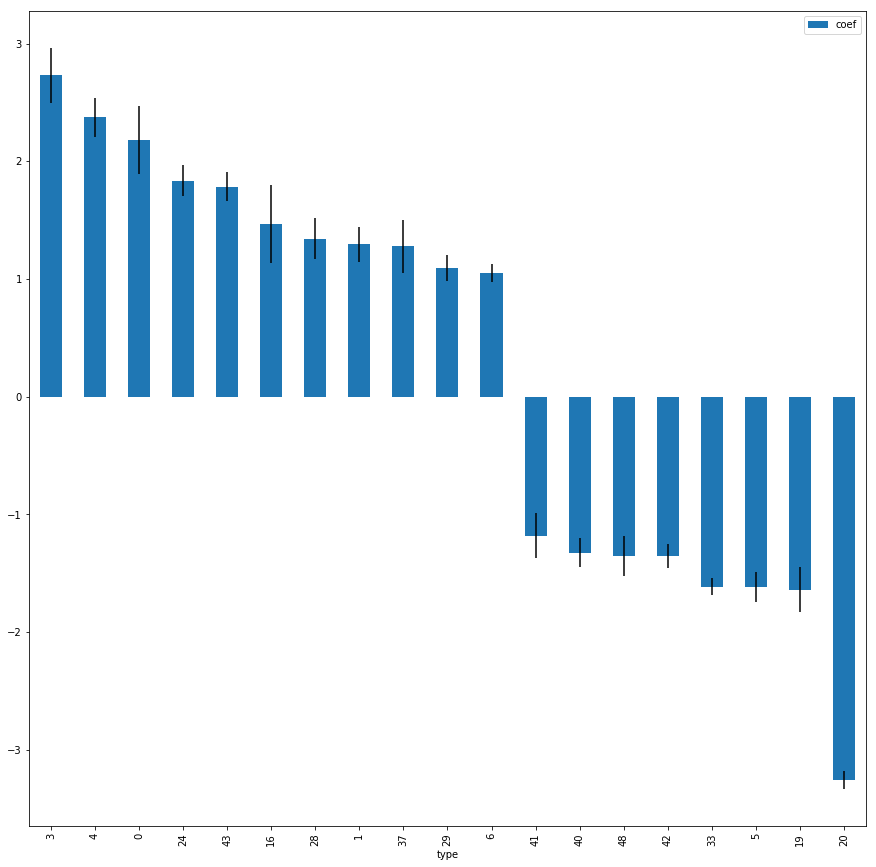

In [21]:
dfCoeffs = pd.DataFrame({'type':X.columns.values, 'coef':coeffs_avg, 'std':coeffs_std})
dfCoeffs = dfCoeffs[(dfCoeffs['coef']>1) |(dfCoeffs['coef']<-1) ]
plt.figure(figsize=(15,15))
dfCoeffs_sorted = dfCoeffs.sort(['coef'])[::-1]
yerr_vals = dfCoeffs_sorted['std'].values
dfCoeffs_sorted.plot(x='type',y='coef',kind='bar',yerr=yerr_vals,figsize=(15,15))